In [1]:
import numpy as np
import src

In [2]:
# from jupyterthemes import jtplot
# jtplot.style(theme='onedork', context='notebook')

# Перша задача, неадаптивні алгоритми

In [3]:
lambda_ = 0.4
tolerance = 1e-3
sizes = (1_000, 2_000, 5_000, 10_000)
algos = ('Корпелевич', 'Tseng', 'Кеш. Tseng', 'Попов', 'Кеш. Попов',
         'Маліцький Tam', 'Кеш. Маліцький Tam')
iters, times = {algo: {} for algo in algos}, {algo: {} for algo in algos}

In [4]:
for size in sizes:
    x_initial = np.ones(size)
    a = src.generate_matrix(size)

    _, iters['Корпелевич'][size], times['Корпелевич'][size] = \
        src.korpelevich(x_initial, lambda_, tolerance,
                        operator=lambda x: a.dot(x))
    
    _, iters['Tseng'][size], times['Tseng'][size] = \
        src.tseng(x_initial, lambda_, tolerance,
                  operator=lambda x: a.dot(x))
    
    _, iters['Кеш. Tseng'][size], times['Кеш. Tseng'][size] = \
        src.cached_tseng(x_initial, lambda_, tolerance,
                         operator=lambda x: a.dot(x))
    
    _, iters['Попов'][size], times['Попов'][size] = \
        src.popov(x_initial, x_initial, lambda_, tolerance,
                  operator=lambda x: a.dot(x))
    
    _, iters['Кеш. Попов'][size], times['Кеш. Попов'][size] = \
        src.cached_popov(x_initial, x_initial, lambda_, tolerance,
                         operator=lambda x: a.dot(x))
    
    _, iters['Маліцький Tam'][size], times['Маліцький Tam'][size] = \
        src.malitskyi_tam(x_initial, x_initial, lambda_, tolerance,
                          operator=lambda x: a.dot(x))

    _, iters['Кеш. Маліцький Tam'][size], times['Кеш. Маліцький Tam'][size] = \
        src.cached_malitskyi_tam(x_initial, x_initial, lambda_, tolerance,
                                 operator=lambda x: a.dot(x))


In [5]:
src.save_values_to_table(times, sizes, fn='1/time', tp='time')
src.save_values_to_table(iters, sizes, fn='1/iter', tp='iter')

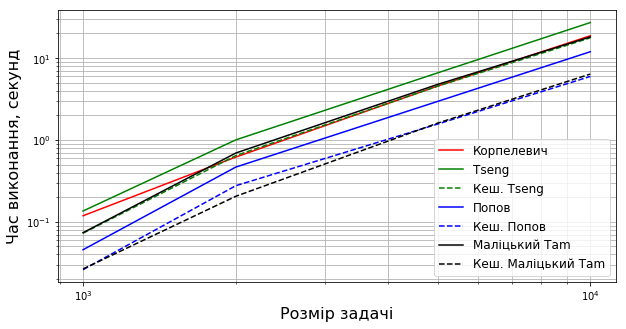

In [6]:
src.save_values_to_image(times,
                         sizes,
                         fn='1/time',
                         styles=('r-', 'g-', 'g--', 'b-', 'b--', 'k-', 'k--'),
                         # styles=('c-', 'm-', 'm--', 'y-', 'y--', 'w-', 'w--'),
                         title='Час виконання, секунд')

# Перша задача, адаптивні алгоритми

In [7]:
tau = 0.4
lambda_initial = 0.4
tolerance = 1e-3
sizes = (1_000, 2_000, 5_000, 10_000)
algos = ('Адапт. Корпелевич', 'Кеш. адапт. Корпелевич', 'Адапт. Tseng',
         'Кеш. адапт. Tseng', 'Адапт. Попов', 'Кеш. адапт. Попов',
         'Адапт. Маліцький Tam', 'Кеш. адапт. Маліцький Tam')
iters, times = {algo: {} for algo in algos}, {algo: {} for algo in algos}

In [8]:
for size in sizes:
    x_initial = np.ones(size)
    a = src.generate_matrix(size)

    _, iters['Адапт. Корпелевич'][size], times['Адапт. Корпелевич'][size] = \
        src.adaptive_korpelevich(x_initial, tau, lambda_initial, tolerance,
                                 operator=lambda x: a.dot(x))

    _, iters['Кеш. адапт. Корпелевич'][size], times['Кеш. адапт. Корпелевич'][size] = \
        src.cached_adaptive_korpelevich(x_initial, tau, lambda_initial, tolerance,
                                        operator=lambda x: a.dot(x))

    _, iters['Адапт. Tseng'][size], times['Адапт. Tseng'][size] = \
        src.adaptive_tseng(x_initial, tau, lambda_initial, tolerance,
                           operator=lambda x: a.dot(x))

    _, iters['Кеш. адапт. Tseng'][size], times['Кеш. адапт. Tseng'][size] = \
        src.cached_adaptive_tseng(x_initial, tau, lambda_initial, tolerance,
                                  operator=lambda x: a.dot(x))
 
    _, iters['Адапт. Попов'][size], times['Адапт. Попов'][size] = \
        src.adaptive_popov(x_initial, x_initial, tau, lambda_initial, tolerance,
                           operator=lambda x: a.dot(x))

    _, iters['Кеш. адапт. Попов'][size], times['Кеш. адапт. Попов'][size] = \
        src.cached_adaptive_popov(x_initial, x_initial, tau, lambda_initial, tolerance,
                                  operator=lambda x: a.dot(x))

    _, iters['Адапт. Маліцький Tam'][size], times['Адапт. Маліцький Tam'][size] = \
        src.adaptive_malitskyi_tam(x_initial, x_initial, tau,
                                   lambda_initial, lambda_initial, tolerance,
                                   operator=lambda x: a.dot(x))

    _, iters['Кеш. адапт. Маліцький Tam'][size], times['Кеш. адапт. Маліцький Tam'][size] = \
        src.cached_adaptive_malitskyi_tam(x_initial, x_initial, tau,
                                          lambda_initial, lambda_initial, tolerance,
                                          operator=lambda x: a.dot(x))


In [9]:
src.save_values_to_table(times, sizes, fn='1/adapt/time', tp='time')
src.save_values_to_table(iters, sizes, fn='1/adapt/iter', tp='iter')

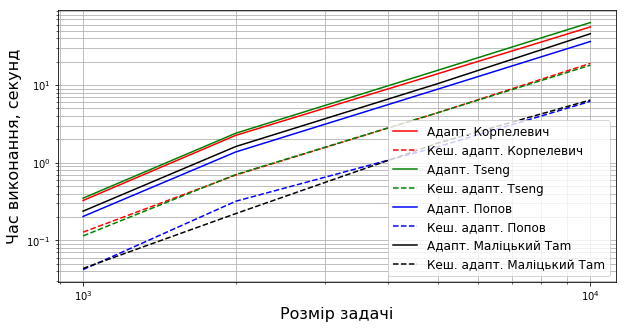

In [10]:
src.save_values_to_image(times,
                         sizes,
                         fn='1/adapt/time',
                         styles=('r-', 'r--', 'g-', 'g--', 'b-', 'b--', 'k-', 'k--'),
                         # styles=('c-', 'c--', 'm-', 'm--', 'y-', 'y--', 'w-', 'w--'),
                         title='Час виконання, секунд')

# Перша задача із розрідженими матрицями, неадаптивні алгоритми

In [11]:
lambda_ = 0.4
tolerance = 1e-3
sizes = (50_000, 100_000, 200_000, 500_000)
algos = ('Корпелевич', 'Tseng', 'Кеш. Tseng', 'Попов', 'Кеш. Попов',
         'Маліцький Tam', 'Кеш. Маліцький Tam')
iters, times = {algo: {} for algo in algos}, {algo: {} for algo in algos}

In [12]:
for size in sizes:
    x_initial = np.ones(size)
    a = src.generate_sparse_matrix(size)

    _, iters['Корпелевич'][size], times['Корпелевич'][size] = \
        src.korpelevich(x_initial, lambda_, tolerance,
                        operator=lambda x: a.dot(x))

    _, iters['Tseng'][size], times['Tseng'][size] = \
        src.tseng(x_initial, lambda_, tolerance,
                  operator=lambda x: a.dot(x))

    _, iters['Кеш. Tseng'][size], times['Кеш. Tseng'][size] = \
        src.cached_tseng(x_initial, lambda_, tolerance,
                         operator=lambda x: a.dot(x))

    _, iters['Попов'][size], times['Попов'][size] = \
        src.popov(x_initial, x_initial, lambda_, tolerance,
                  operator=lambda x: a.dot(x))

    _, iters['Кеш. Попов'][size], times['Кеш. Попов'][size] = \
        src.cached_popov(x_initial, x_initial, lambda_, tolerance,
                         operator=lambda x: a.dot(x))

    _, iters['Маліцький Tam'][size], times['Маліцький Tam'][size] = \
        src.malitskyi_tam(x_initial, x_initial, lambda_, tolerance,
                          operator=lambda x: a.dot(x))

    _, iters['Кеш. Маліцький Tam'][size], times['Кеш. Маліцький Tam'][size] = \
        src.cached_malitskyi_tam(x_initial, x_initial, lambda_, tolerance,
                                 operator=lambda x: a.dot(x))

In [13]:
src.save_values_to_table(times, sizes, fn='1/sparse/time', tp='time')
src.save_values_to_table(iters, sizes, fn='1/sparse/iter', tp='iter')

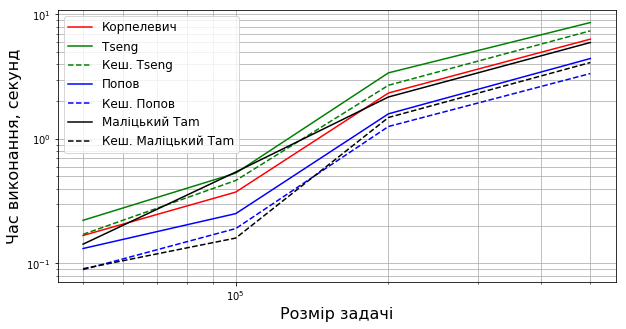

In [14]:
src.save_values_to_image(times,
                         sizes,
                         fn='1/sparse/time',
                         styles=('r-', 'g-', 'g--', 'b-', 'b--', 'k-', 'k--'),
                         # styles=('c-', 'm-', 'm--', 'y-', 'y--', 'w-', 'w--'),
                         title='Час виконання, секунд')

# Перша задача із розрідженими матрицями, адаптивні алгоритми

In [15]:
tau = 0.4
lambda_initial = 0.4
tolerance = 1e-3
sizes = (50_000, 100_000, 200_000, 500_000)
algos = ('Адапт. Корпелевич', 'Кеш. адапт. Корпелевич', 'Адапт. Tseng',
         'Кеш. адапт. Tseng', 'Адапт. Попов', 'Кеш. адапт. Попов',
         'Адапт. Маліцький Tam', 'Кеш. адапт. Маліцький Tam')
iters, times = {algo: {} for algo in algos}, {algo: {} for algo in algos}

In [16]:
for size in sizes:
    x_initial = np.ones(size)
    a = src.generate_sparse_matrix(size)

    _, iters['Адапт. Корпелевич'][size], times['Адапт. Корпелевич'][size] = \
        src.adaptive_korpelevich(x_initial, tau, lambda_initial, tolerance,
                                 operator=lambda x: a.dot(x))

    _, iters['Кеш. адапт. Корпелевич'][size], times['Кеш. адапт. Корпелевич'][size] = \
        src.cached_adaptive_korpelevich(x_initial, tau, lambda_initial, tolerance,
                                        operator=lambda x: a.dot(x))

    _, iters['Адапт. Tseng'][size], times['Адапт. Tseng'][size] = \
        src.adaptive_tseng(x_initial, tau, lambda_initial, tolerance,
                           operator=lambda x: a.dot(x))

    _, iters['Кеш. адапт. Tseng'][size], times['Кеш. адапт. Tseng'][size] = \
        src.cached_adaptive_tseng(x_initial, tau, lambda_initial, tolerance,
                                  operator=lambda x: a.dot(x))
 
    _, iters['Адапт. Попов'][size], times['Адапт. Попов'][size] = \
        src.adaptive_popov(x_initial, x_initial, tau, lambda_initial, tolerance,
                           operator=lambda x: a.dot(x))

    _, iters['Кеш. адапт. Попов'][size], times['Кеш. адапт. Попов'][size] = \
        src.cached_adaptive_popov(x_initial, x_initial, tau, lambda_initial, tolerance,
                                  operator=lambda x: a.dot(x))

    _, iters['Адапт. Маліцький Tam'][size], times['Адапт. Маліцький Tam'][size] = \
        src.adaptive_malitskyi_tam(x_initial, x_initial, tau,
                                   lambda_initial, lambda_initial, tolerance,
                                   operator=lambda x: a.dot(x))

    _, iters['Кеш. адапт. Маліцький Tam'][size], times['Кеш. адапт. Маліцький Tam'][size] = \
        src.cached_adaptive_malitskyi_tam(x_initial, x_initial, tau,
                                          lambda_initial, lambda_initial, tolerance,
                                          operator=lambda x: a.dot(x))


In [17]:
src.save_values_to_table(times, sizes, fn='1/sparse/adapt/time', tp='time')
src.save_values_to_table(iters, sizes, fn='1/sparse/adapt/iter', tp='iter')

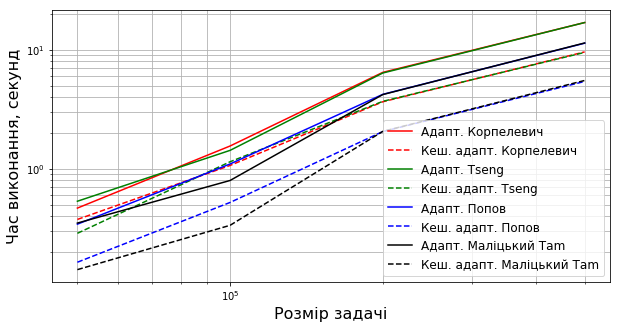

In [18]:
src.save_values_to_image(times,
                         sizes,
                         fn='1/sparse/adapt/time',
                         styles=('r-', 'r--', 'g-', 'g--', 'b-', 'b--', 'k-', 'k--'),
                         # styles=('c-', 'c--', 'm-', 'm--', 'y-', 'y--', 'w-', 'w--'),
                         title='Час виконання, секунд')